In [1]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 5.4 MB/s 
     |████████████████████████████████| 57 kB 4.7 MB/s 
     |████████████████████████████████| 275 kB 57.8 MB/s 
     |████████████████████████████████| 2.3 MB 30.5 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 212 kB 51.6 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 141 kB 42.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 80 kB 7.3 MB/s 
     |████████████████████████████████| 68 kB 6.0 MB/s 
     |████████████████████████████████| 43 kB 877 kB/s 
     |████████████████████████████████| 62 kB 900 kB/s 
     |████████████████████████████████| 4.1 MB 27.5 

In [2]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from google.colab import drive
import os, cv2, glob, random, datetime

import gradio as gr

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/My Drive/Colab Notebooks/'

/content/drive/My Drive/Colab Notebooks


In [5]:
base_dir = '/content/drive/My Drive/Colab Notebooks/coffeebeans/'
honey_dir = 'Honey/Guatemala/'
natural_dir = 'Natural/Ethiopia/'
washed_dir = 'Washed/Panama/'
coffee_folders = ['Honey/Guatemala' , 'Natural/Ethiopia', 'Washed/Panama']

In [6]:
#CSVLogger
folder = './coffeebeans/save_coffee_record'
if not os.path.exists(folder):
    os.mkdir(folder)
    
csv_path = './coffeebeans/save_coffee_record/train_imdb_log.csv'  # 檔案儲存的位置

csvlogger = callbacks.CSVLogger(csv_path, 
                                separator=',', # 檔案中的分隔字串
                                append=False)  # 是否覆蓋已存在的檔案

In [7]:
#ModelCheckpoint
folder = './coffeebeans/save_coffee_model'
if not os.path.exists(folder):
    os.mkdir(folder)
    
model_path = './coffeebeans/save_coffee_model/coffee_beans_model.h5'  # 模型儲存的位置

# 建立 Checkpoint
checkpoint = callbacks.ModelCheckpoint(model_path,
                                       verbose=1,
                                       monitor='val_loss',   # 儲存模型的觀察指標
                                       save_best_only=True,  # 是否只儲存最好的
                                       mode='min')           # 與指標搭配模式

In [8]:
#EarlyStopping
n_patience = 5  # 訓練過程經過 n_patience 次沒有進步就不忍了，數字要大於下面的ReduceLROnPlateau
early_stopping = callbacks.EarlyStopping(monitor='val_loss',   # 停止訓練的觀察指標
                                         patience=n_patience,
                                         verbose=1)

In [9]:
#ReduceLROnPlateau
lr_patience = 3 # 訓練過程經過 lr_patience 次沒有進步，就會調整學習率
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', # 調整學習率的觀察指標
                                        factor=0.1, # 縮放學習率的值，lr = lr*factor
                                        patience=lr_patience, 
                                        min_lr=1e-4, # 學習率縮放的最小值
                                        verbose=1,
                                        mode='min') # 與指標搭配模式

In [10]:
%load_ext tensorboard

In [11]:
logdir = os.path.join('coffeelogs', 
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = callbacks.TensorBoard(logdir,             # 訓練記錄儲存的位置
                                    histogram_freq=1)   # 每一個epoch統計1次參數分布的直方圖

In [12]:
thedir = base_dir + coffee_folders[0]
os.listdir(thedir)

['P1310362.JPG',
 'P1310363.JPG',
 'P1310364.JPG',
 'P1310365.JPG',
 'P1310366.JPG',
 'P1310367.JPG',
 'P1310368.JPG',
 'P1310369.JPG',
 'P1310370.JPG',
 'P1310371.JPG',
 'P1310372.JPG',
 'P1310373.JPG',
 'P1310374.JPG',
 'P1310375.JPG',
 'P1310376.JPG',
 'P1310377.JPG',
 'P1310378.JPG',
 'P1310379.JPG',
 'P1310380.JPG',
 'P1310381.JPG',
 'P1310382.JPG',
 'P1310383.JPG',
 'P1310384.JPG',
 'P1310385.JPG',
 'P1310386.JPG',
 'P1310388.JPG',
 'P1310387.JPG',
 'P1310389.JPG',
 'P1310391.JPG',
 'P1310390.JPG',
 'P1310392.JPG',
 'P1310393.JPG',
 'P1310394.JPG',
 'P1310395.JPG',
 'P1310396.JPG',
 'P1310398.JPG',
 'P1310397.JPG',
 'P1310399.JPG',
 'P1310400.JPG',
 'P1310401.JPG',
 'P1310402.JPG',
 'P1310403.JPG',
 'P1310404.JPG',
 'P1310405.JPG',
 'P1310406.JPG',
 'P1310407.JPG',
 'P1310408.JPG',
 'P1310409.JPG',
 'P1310410.JPG',
 'P1310411.JPG',
 'P1310412.JPG',
 'P1310413.JPG',
 'P1310414.JPG',
 'P1310415.JPG',
 'P1310416.JPG']

In [13]:
data = []
target = []
for i in range(3):
    thedir = base_dir + coffee_folders[i]
    coffee_fnames = os.listdir(thedir)
    for coffee in coffee_fnames:
        img_path = thedir + '/' + coffee
        img = load_img(img_path , target_size = (256,256))
        x = img_to_array(img)
        data.append(x)
        target.append(i)

In [14]:
data = np.array(data)
data.shape

(463, 256, 256, 3)

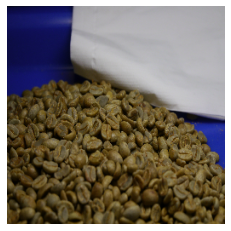

In [15]:
n = 1
plt.imshow(data[n]/255)
plt.axis('off');

In [16]:
x_train = preprocess_input(data)

In [17]:
target[n]

0

In [18]:
y_train = to_categorical(target, 3)

In [19]:
resnet = ResNet50V2(include_top=False, pooling="avg")

94683136/94668760 [==============================] - 1s 0us/step


In [20]:
model = Sequential()
model.add(resnet)
model.add(Dense(3, activation='softmax'))
resnet.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
Total params: 23,570,947
Trainable params: 6,147
Non-trainable params: 23,564,800
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [22]:
callbacks_list = [csvlogger, checkpoint, early_stopping, reduce_lr, tensorboard]

In [23]:
history = model.fit(x_train, y_train, 
                    batch_size=23, 
                    epochs=100,
                    callbacks = callbacks_list)

Epoch 1/100
21/21 [==============================] - 87s 4s/step - loss: 0.8932 - accuracy: 0.6868 - lr: 0.0010
Epoch 2/100
21/21 [==============================] - 85s 4s/step - loss: 0.4712 - accuracy: 0.8337 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - 85s 4s/step - loss: 0.3564 - accuracy: 0.8747 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - 82s 4s/step - loss: 0.2850 - accuracy: 0.9114 - lr: 0.0010
Epoch 5/100
21/21 [==============================] - 84s 4s/step - loss: 0.2515 - accuracy: 0.9158 - lr: 0.0010
Epoch 6/100
21/21 [==============================] - 83s 4s/step - loss: 0.2221 - accuracy: 0.9309 - lr: 0.0010
Epoch 7/100
13/21 [=================>............] - ETA: 30s - loss: 0.1806 - accuracy: 0.9632

KeyboardInterrupt: ignored

In [ ]:
y_predict = np.argmax(model.predict(x_train), -1)

In [ ]:
loss, acc = model.evaluate(x_train, y_train)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

In [ ]:
labels = ["蜜處理", "日曬", "水洗"]

In [ ]:
def classify_image(inp):
    inp = inp.reshape((-1, 256, 256, 3))
    inp = preprocess_input(inp)
    prediction = model.predict(inp).flatten()
    return {labels[i]: float(prediction[i]) for i in range(3)}

In [ ]:
def classify_image(inp):
    inp = inp.reshape((-1, 256, 256, 3))
    inp = preprocess_input(inp)
    prediction = model.predict(inp).flatten()
    return {labels[i]: float(prediction[i]) for i in range(3)}

In [ ]:
image = gr.Image(shape=(256, 256), label="生豆照片")
label = gr.Label(num_top_classes=3, label="AI辨識結果")
some_text="我能辨識生豆處理法。找張生豆照片來考我吧!"

In [ ]:
sample_images = []
for i in range(3):
    thedir = base_dir + coffee_folders[i]
    for file in os.listdir(thedir):
        sample_images.append(coffee_folders[i] + '/' + file)

In [ ]:
gr.Interface(fn=classify_image, 
             inputs=image, 
             outputs=label,
             title="AI 生豆辨識機",
             description=some_text,
             ).launch()

In [ ]:
model.save('coffee_beans_model.h5')

In [ ]:
# 訓練結束後可以使用魔術指令開啟tensorboard
%tensorboard --logdir coffeelogs